### Glacier Extent Change

ECE471 Remote Sensing Final Project

The Cooper Union

Spring 2021

Ernesto C., Chanoch G., David L.

In [1]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt

### Create a map and add the GLIMS layer on top to visualize glaciers

Link to GLIMS dataset: https://developers.google.com/earth-engine/datasets/catalog/GLIMS_current

In [2]:
Map = geemap.Map()

dataset = ee.FeatureCollection('GLIMS/current')
visParams = {
  'palette': ['gray', 'cyan', 'blue'],
  'min': 0.0,
  'max': 10.0,
  'opacity': 0.8,
}
image = ee.Image().float().paint(dataset, 'area')

# Columbia Glacier, Alaska
lat = 61.1202022
long = -147.1260955

Map.setCenter(long, lat, 9)
Map.addLayer(image, visParams, 'GLIMS/current')
Map.addLayer(dataset, {}, 'for Inspector', False)

# Display map
Map

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

In [3]:
import json
columbia_glacier_file = 'columbia_glacier.geojson'
with open(columbia_glacier_file, 'r') as f:
  fc = json.load(f)

# grab the WGS geometry
geometry = fc['features'][0]['geometry']

# Create region of interest
roi = ee.Geometry(geometry)

In [4]:
from pprint import pprint
pprint(geometry)

{'coordinates': [[[-147.340617, 60.971976],
                  [-147.340617, 61.174791],
                  [-146.728045, 61.174791],
                  [-146.728045, 60.971976],
                  [-147.340617, 60.971976]]],
 'type': 'Polygon'}


#### Create RGB timelapse


In [5]:
# Create a new map for our timelapse
rgb_timelapse_map = geemap.Map()
rgb_timelapse_map.setCenter(long, lat, 9)
rgb_timelapse_map

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

In [8]:
# Add timelapse

label = 'Glacier Change'
rgb_timelapse_map.add_landsat_ts_gif(roi=roi,
                                label=label,
                                start_year=2000,
                                end_year=2020,
                                bands=['Red', 'Green', 'Blue'],
                                font_color='red',
                                frames_per_second=0.5,
                                progress_bar_color='blue',
                                download=False
                                )

Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\ernes\Downloads\landsat_ts_mfo.gif
Adding animated text to GIF ...
Adding GIF to the map ...
The timelapse has been added to the map.


#### Create SWIR, NIR, Green Composite

In [6]:
# Create a new map for our timelapse
timelapse_map = geemap.Map()
timelapse_map.setCenter(long, lat, 10)
timelapse_map

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

In [9]:
label = 'Glacier Change'
timelapse_map.add_landsat_ts_gif(roi=roi,
                                label=label,
                                start_year=2000,
                                end_year=2020,
                                bands=['SWIR1', 'NIR', 'Green'],
                                font_color='red',
                                frames_per_second=0.5,
                                progress_bar_color='blue',
                                download=False
                                )

Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\ernes\Downloads\landsat_ts_wih.gif
Adding animated text to GIF ...
Adding GIF to the map ...
The timelapse has been added to the map.


### Create an RGB median composite from Landsat 8 imagery

In [7]:
def maskL8sr(image):
  # Bits 3 and 5 are cloud shadow and cloud, respectively.
  cloudShadowBitMask = (1 << 3)
  cloudsBitMask = (1 << 5)
  # Get the pixel QA band.
  qa = image.select('pixel_qa')
  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0) \
                 .And(qa.bitwiseAnd(cloudsBitMask).eq(0))
  return image.updateMask(mask)

start_date = '2015-05-01'
end_date = '2015-12-31'

dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_date, end_date).filterBounds(roi).map(maskL8sr)

visParams = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}


Map5 = geemap.Map(center=(lat, long), zoom=10)
Map5.addLayer(dataset.median(), visParams)
Map5

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

### SWIR1, NIR, Green False Color Median Composite from Landsat 8 imagery

In [8]:
visParams = {
  'bands': ['B6', 'B5', 'B3'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}


Map6 = geemap.Map(center=(lat, long), zoom=10)
Map6.addLayer(dataset.median(), visParams)
Map6

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

#### Downloading RGB and SWIR+NIR+Green Composites to Disk

Uncomment the cells shown below to download the tiff files to disk. 

In [9]:
'''
# Define start and end date lists to create composites
start_dates = ['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01']
end_dates = ['2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31']
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
'''

In [9]:
'''
dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_dates[0], end_dates[0]).map(maskL8sr)

visParams = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
'''

"\ndataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_dates[0], end_dates[0]).map(maskL8sr)\n\nvisParams = {\n  'bands': ['B4', 'B3', 'B2'],\n  'min': 0,\n  'max': 6000,\n  'gamma': 1.4,\n}\n"

In [10]:
'''
# we need to set the scale and CRS of the data we want to export
# we also need to select the bands we want to export

median = dataset.reduce(ee.Reducer.median()).select(['B4_median', 'B3_median', 'B2_median'])
median.getInfo()
'''

"\n# we need to set the scale and CRS of the data we want to export\n# we also need to select the bands we want to export\n\nmedian = dataset.reduce(ee.Reducer.median()).select(['B4_median', 'B3_median', 'B2_median'])\nmedian.getInfo()\n"

In [11]:
'''
image = median.clip(roi).unmask()
'''

'\nimage = median.clip(roi).unmask()\n'

In [12]:
'''
geemap.ee_export_image(image, filename='rgb_median_2013.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)
'''

"\ngeemap.ee_export_image(image, filename='rgb_median_2013.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)\n"

In [13]:
'''
# Now loop throgh each year and store the rasters

for idx in range(len(start_dates)):
    
    print('current idx: ', idx)
    
    # filter dataset by dates
    yrly_dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_dates[idx], end_dates[idx]).map(maskL8sr)
    
    # compute median composite
    yrly_rgb_median_comp =  yrly_dataset.reduce(ee.Reducer.median()).select(['B4_median', 'B3_median', 'B2_median'])
    yrly_false_col_median = yrly_dataset.reduce(ee.Reducer.median()).select(['B6_median', 'B5_median', 'B3_median'])
    
    # clip median composite to roi bounds
    median_comp_rgb_img = yrly_rgb_median_comp.clip(roi).unmask()
    median_comp_false_col_img = yrly_false_col_median.clip(roi).unmask()
    
    # export image
    geemap.ee_export_image(median_comp_rgb_img, filename='composites/rgb/rgb_median_'+ years[idx] +'.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)
    geemap.ee_export_image(median_comp_false_col_img, filename='composites/false_color/false_color_median_'+ years[idx] +'.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)
    
print('done')
'''

"\n# Now loop throgh each year and store the rasters\n\nfor idx in range(len(start_dates)):\n    \n    print('current idx: ', idx)\n    \n    # filter dataset by dates\n    yrly_dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_dates[idx], end_dates[idx]).map(maskL8sr)\n    \n    # compute median composite\n    yrly_rgb_median_comp =  yrly_dataset.reduce(ee.Reducer.median()).select(['B4_median', 'B3_median', 'B2_median'])\n    yrly_false_col_median = yrly_dataset.reduce(ee.Reducer.median()).select(['B6_median', 'B5_median', 'B3_median'])\n    \n    # clip median composite to roi bounds\n    median_comp_rgb_img = yrly_rgb_median_comp.clip(roi).unmask()\n    median_comp_false_col_img = yrly_false_col_median.clip(roi).unmask()\n    \n    # export image\n    geemap.ee_export_image(median_comp_rgb_img, filename='composites/rgb/rgb_median_'+ years[idx] +'.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)\n    geemap.ee_export_image(median_comp_false_col

In [14]:
#### Loading and working with the images previously saved to disk

In [15]:
from skimage import io
import skimage

def normalize_zero_one(img):
    """
    Function to normalize intensity values between [0,1]
    @param img: ndarray-like image
    @return: ndarray-like image normalized between 0 and 1
    """
    # convert image to float
    img = skimage.img_as_float(img)

    # normalize
    img_normalized = (img - img.min()) / (img.max() - img.min())

    return img_normalized

def rescale_by_percentile(img, bottom = 2, top=98):

    # Compute min and max percentile values from image
    vmin, vmax = np.percentile(img, (bottom, top))

    # Use scikit-image to rescale the intensity
    img_rscld = skimage.exposure.rescale_intensity(img, in_range=(vmin, vmax))

    return img_rscld

-1432.0
16000.0
(754, 1106, 3)
-1432.0
16000.0


C:\Users\ernes\anaconda3\envs\remote-sensing\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


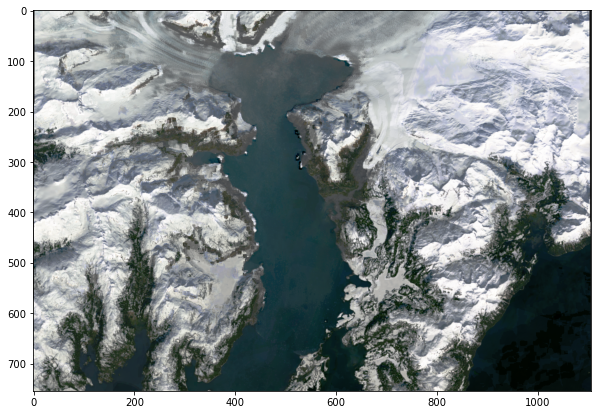

In [16]:
load_img = skimage.img_as_float(io.imread('composites/rgb/rgb_median_2013.tif'))

print(np.min(load_img))
print(np.max(load_img))
print(load_img.shape)

#load_img = skimage.exposure.rescale_intensity(load_img)

print(np.min(load_img))
print(np.max(load_img))

#load_img = skimage.exposure.adjust_gamma(normalize_zero_one(load_img), 1.4)
#load_img = normalize_zero_one(skimage.exposure.adjust_gamma(load_img, 1.4))
#load_img = normalize_zero_one(load_img)
load_img = skimage.exposure.equalize_hist(load_img)

#load_img = np.clip(load_img / 6000, 0, 1)
#load_img = np.clip(skimage.exposure.adjust_log(load_img, 1.4) / 6000, 0, 1)

plt.figure(figsize=(10, 10))
plt.imshow(load_img)

-1182.0
16000.0
(754, 1106, 3)
0.0
1.0


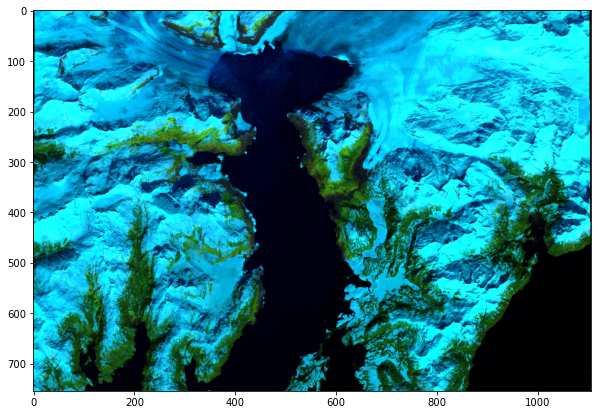

In [17]:
# Load false color composite form landsat 8
load_false_col = skimage.img_as_float(io.imread('composites/false_color/false_color_median_2013.tif'))
print(np.min(load_false_col))
print(np.max(load_false_col))
print(load_false_col.shape)

load_false_col = normalize_zero_one(load_false_col)
load_false_col = rescale_by_percentile(load_false_col, bottom=10, top=90)
#load_false_col = skimage.exposure.equalize_hist(load_false_col)

print(np.min(load_false_col))
print(np.max(load_false_col))

plt.figure(figsize=(10, 10))
plt.imshow(load_false_col)

#### Plot Landsat 8 RGB and False Color Composites from 2013 to 2020

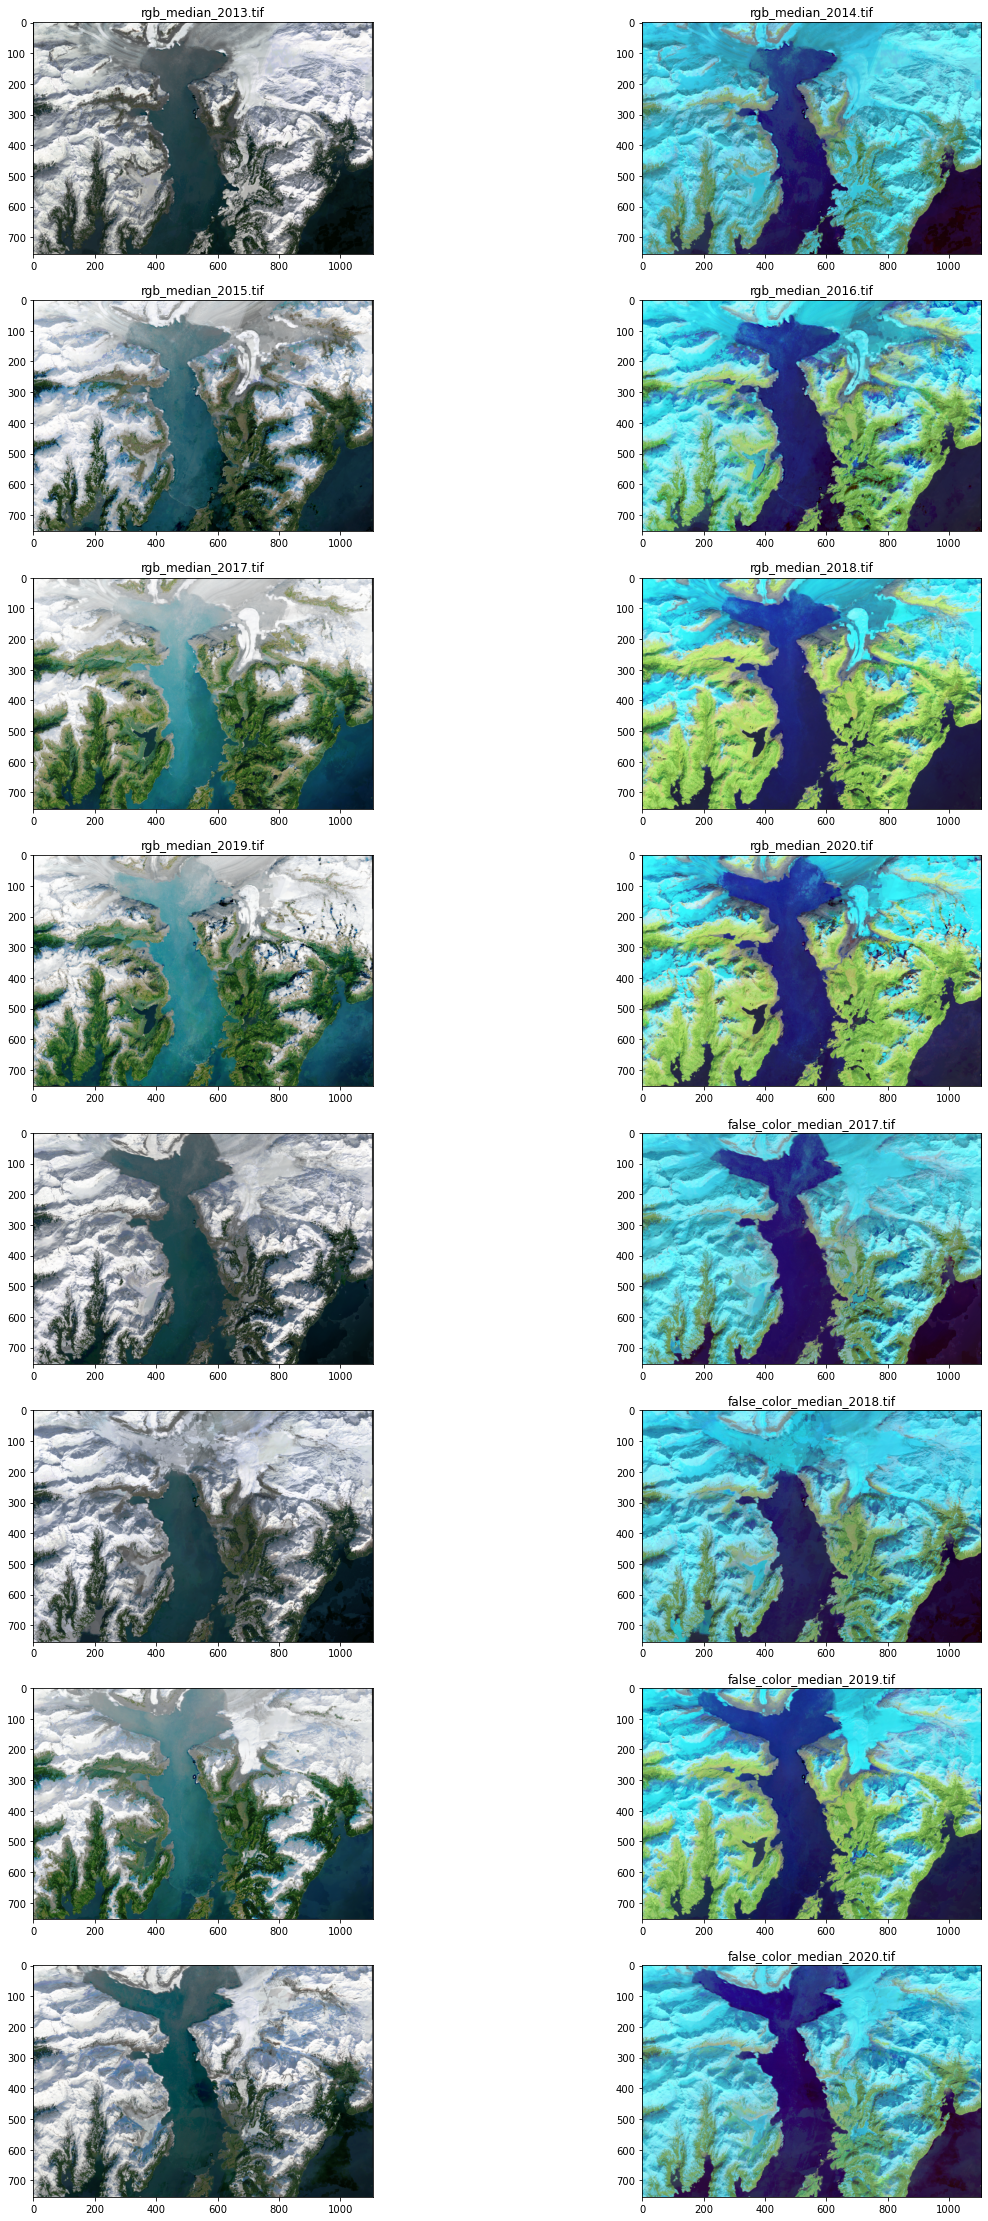

In [21]:
import os
rgb_fn = os.listdir('composites/rgb')
false_color_fn = os.listdir('composites/false_color')

#print(rgb_fn)

fig, ax = plt.subplots(8, 2, figsize=(20, 40))
ax = ax.ravel()

# load all the composites
for idx, fn in enumerate(rgb_fn):
    
    img = skimage.img_as_float(io.imread('composites/rgb/' + fn))
    img = skimage.exposure.equalize_hist(img)
    
    false_color = skimage.img_as_float(io.imread('composites/false_color/' + false_color_fn[idx]))
    false_color = skimage.exposure.equalize_hist(false_color)
    
    ax[2*idx].imshow(img)
    ax[idx].set_title(fn)
    
    ax[2*idx + 1].imshow(false_color)
    ax[2*idx + 1].set_title(false_color_fn[idx])

### Trying out an index and threshold approach to detect ice

reference: https://www.mdpi.com/2072-4292/8/7/575/htm

Ratio: NIR/SWIR

In [22]:
# compute median for selected year and keep all bands
median_all_bands = dataset.reduce(ee.Reducer.median()).reproject(crs='EPSG:32606', scale=30)


nir = median_all_bands.select('B5_median')
swir = median_all_bands.select('B6_median')

# compute NIR/SWIR ratio
#nir_swir_ratio = median_all_bands.select('B5').divide(median_all_bands.select('B6')).reproject(crs='EPSG:32606', scale=30)

#median_all_bands.getInfo()
#nir_swir_ratio.getInfo()
nir.getInfo()
swir.getInfo()

{'type': 'Image',
 'bands': [{'id': 'B6_median',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -32768,
    'max': 32767},
   'crs': 'EPSG:32606',
   'crs_transform': [30, 0, 0, 0, -30, 0]}]}

In [23]:
ratio = nir.divide(swir)
ratio.getInfo()

{'type': 'Image',
 'bands': [{'id': 'B5_median',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'crs': 'EPSG:32606',
   'crs_transform': [30, 0, 0, 0, -30, 0]}]}

In [24]:
nir_swir_vis_params = {
    'min' : 0,
    'max' : 40
}

Map7 = geemap.Map(center=(lat, long), zoom=10)
#Map7.addLayer(nir_swir_ratio, nir_swir_vis_params)
Map7.addLayer(ratio, nir_swir_vis_params)
Map7

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

### Saving the SWIR and NIR Bands to numpy arrays for now

Uncomment the cells below to save the files to disk

In [25]:
'''
# filter dataset by dates
dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_dates[2], end_dates[2]).map(maskL8sr)
    
# compute median composite
#median_comp =  dataset.reduce(ee.Reducer.median())
median_comp =  dataset.reduce(ee.Reducer.median()).select('B5_median', 'B6_median')
    
# clip median composite to roi bounds
median_comp = median_comp.clip(roi).unmask()
    
# export image
geemap.ee_export_image(median_comp, filename='composites/all_bands/median_'+ years[2] +'.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)
'''

"\n# filter dataset by dates\ndataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_dates[2], end_dates[2]).map(maskL8sr)\n    \n# compute median composite\n#median_comp =  dataset.reduce(ee.Reducer.median())\nmedian_comp =  dataset.reduce(ee.Reducer.median()).select('B5_median', 'B6_median')\n    \n# clip median composite to roi bounds\nmedian_comp = median_comp.clip(roi).unmask()\n    \n# export image\ngeemap.ee_export_image(median_comp, filename='composites/all_bands/median_'+ years[2] +'.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)\n"

In [26]:
# Load the NIR and SWIR tiff so I can experiment with numpy instead
nir_swir_img = skimage.img_as_float(io.imread('composites/all_bands/median_2015.tif'))
print("Min is: ", np.min(nir_swir_img))
print("Max is: ", np.max(nir_swir_img))
print(nir_swir_img.shape)
print(nir_swir_img[0,0].dtype)

Min is:  -296.0
Max is:  14940.0
(754, 1106, 2)
float64


In [28]:
# normalize to [0, 1]
norm_nir_swir_img = normalize_zero_one(nir_swir_img)

print("Min is: ", np.min(norm_nir_swir_img))
print("Max is: ", np.max(norm_nir_swir_img))

Min is:  0.0
Max is:  1.0


In [29]:
# compute the ratio using numpy
ice_ratio = norm_nir_swir_img[:, :, 0] / (norm_nir_swir_img[:, :, 1] + 1e-10)

print("Min is: ", np.min(ice_ratio))
print("Max is: ", np.max(ice_ratio))
print(ice_ratio.shape)
print(ice_ratio[0,0].dtype)

Min is:  0.0
Max is:  22.710472208210113
(754, 1106)
float64


In [30]:
# normalize the ratio to [0, 1]
norm_ice_ratio = normalize_zero_one(ice_ratio)

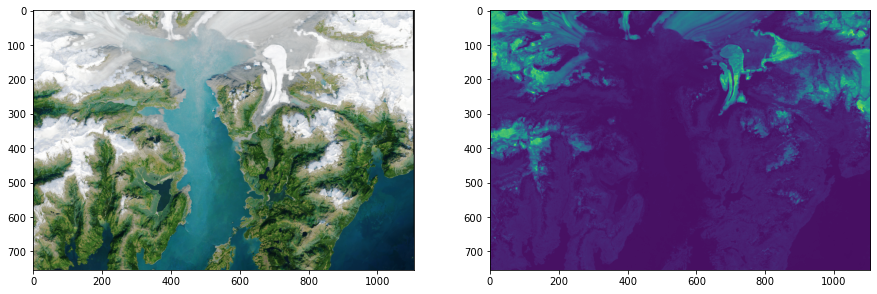

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax = ax.ravel()

rgb = skimage.exposure.equalize_hist(skimage.img_as_float(io.imread('composites/rgb/' + rgb_fn[2])))

ax[0].imshow(rgb)
ax[1].imshow(ice_ratio);

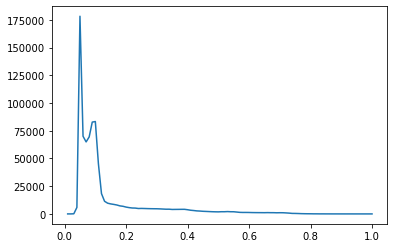

In [32]:
# plot ice ratio distribution
ice_hist, ice_bins = np.histogram(norm_ice_ratio, bins=100)

plt.figure()
plt.plot(ice_bins[1:], ice_hist)

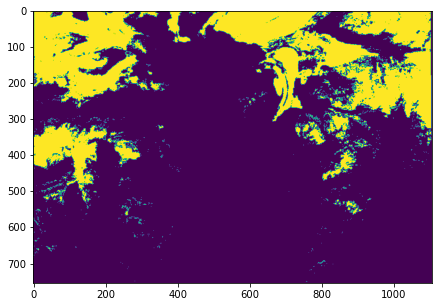

In [33]:
# threshold the ice ratio image
thresh = 0.15

thresh_ice_ratio = np.where(norm_ice_ratio > thresh, 1, 0)

plt.figure(figsize=(7.5, 5))
plt.imshow(thresh_ice_ratio)

#### Check out the NDSI dataset from GEE

In [34]:
js_snippet = """

var dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDSI')
                  .filterDate('2017-01-01', '2017-12-31');
var colorized = dataset.select('NDSI');
var colorizedVis = {
  palette: ['000088', '0000FF', '8888FF', 'FFFFFF'],
};
Map.setCenter(6.746, 46.529, 6);
Map.addLayer(colorized, colorizedVis, 'Colorized');

"""

In [35]:
#geemap.js_snippet_to_py(js_snippet, add_new_cell=True, import_ee=False, import_geemap=False, show_map=False)

In [38]:
l8_ndsi_dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDSI').filterDate(start_date, end_date).filterBounds(roi)

colorized = l8_ndsi_dataset.select('NDSI')

colorizedVis = {
  'palette': ['000088', '0000FF', '8888FF', 'FFFFFF'],
}

#Map.setCenter(6.746, 46.529, 6)
#Map.addLayer(colorized, colorizedVis, 'Colorized')

Map = geemap.Map(center=(lat, long), zoom=10)
Map.addLayer(colorized, colorizedVis, 'Colorized')
Map

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

Not very useful...

### Let's compute NDSI manually using numpy instead

Year 2015 for illustrative purposes

In [41]:
# filter dataset by dates
start_date = '2015-05-01'
end_date = '2015-12-31'
#dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_dates[2], end_dates[2]).map(maskL8sr)
dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_date, end_date).map(maskL8sr)
    
# compute median composite
#median_comp =  dataset.reduce(ee.Reducer.median())
median_comp =  dataset.reduce(ee.Reducer.median()).select('B3_median', 'B6_median')
    
# clip median composite to roi bounds
median_comp = median_comp.clip(roi).unmask()
    
# export image
#geemap.ee_export_image(median_comp, filename='composites/all_bands/median_for_ndsi_'+ years[2] +'.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)
geemap.ee_export_image(median_comp, filename='composites/all_bands/median_for_ndsi_2015.tif', crs='EPSG:32606', scale=30, region=roi, file_per_band=False)


Generating URL ...
Please wait ...
Data downloaded to C:\Users\ernes\OneDrive - The Cooper Union for the Advancement of Science and Art\Remote Sensing\final_project\composites\all_bands\median_for_ndsi_2015.tif


In [42]:
# Load the green and swir bands image

green_swir_img = skimage.img_as_float(io.imread('composites/all_bands/median_for_ndsi_2015.tif'))
print("Min is: ", np.min(green_swir_img))
print("Max is: ", np.max(green_swir_img))
print(green_swir_img.shape)
print(green_swir_img[0,0].dtype)

Min is:  -21.5
Max is:  14640.5
(754, 1106, 2)
float64


In [43]:
norm_green_swir_img = normalize_zero_one(green_swir_img)

print("Min is: ", np.min(norm_green_swir_img))
print("Max is: ", np.max(norm_green_swir_img))

Min is:  0.0
Max is:  1.0


In [44]:
# compute the ratio using numpy
ndsi = (norm_green_swir_img[:, :, 0] -  norm_green_swir_img[:, :, 1])/ (norm_green_swir_img[:, :, 1] + norm_green_swir_img[:, :, 0] + 1e-10)

print("Min is: ", np.min(ndsi))
print("Max is: ", np.max(ndsi))
print(ndsi.shape)
print(ndsi[0,0].dtype)

Min is:  -0.733685518621588
Max is:  0.9999999971667632
(754, 1106)
float64


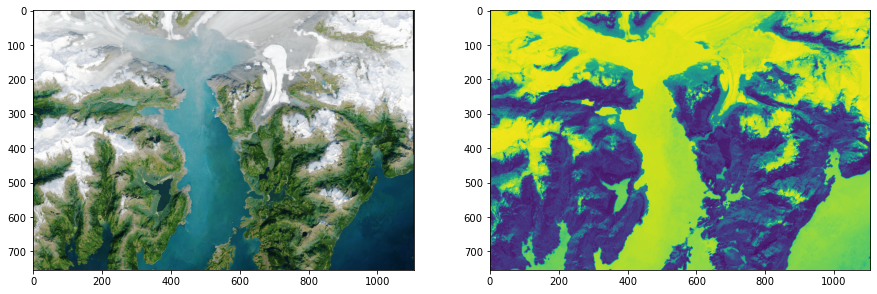

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax = ax.ravel()

#rgb = skimage.exposure.equalize_hist(skimage.img_as_float(io.imread('composites/rgb/' + rgb_fn[2])))

ax[0].imshow(rgb)
ax[1].imshow(ndsi);

It will be difficult to isolate water from ice/snow using NDSI. We are better off using the NIR/SWIR ratio

### May need to fuse Landsat 7 data in addition to the Landsat 8 data to go back to ~2000 and see the glacier changing

In [45]:
js_snippet = """

var cloudMaskL457 = function(image) {
  var qa = image.select('pixel_qa');
  // If the cloud bit (5) is set and the cloud confidence (7) is high
  // or the cloud shadow bit is set (3), then it's a bad pixel.
  var cloud = qa.bitwiseAnd(1 << 5)
                  .and(qa.bitwiseAnd(1 << 7))
                  .or(qa.bitwiseAnd(1 << 3));
  // Remove edge pixels that don't occur in all bands
  var mask2 = image.mask().reduce(ee.Reducer.min());
  return image.updateMask(cloud.not()).updateMask(mask2);
};

var dataset = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR')
                  .filterDate('1999-01-01', '2002-12-31')
                  .map(cloudMaskL457);

var visParams = {
  bands: ['B3', 'B2', 'B1'],
  min: 0,
  max: 3000,
  gamma: 1.4,
};
Map.setCenter(-83.0539, 42.3159, 10);
Map.addLayer(dataset.median(), visParams);

"""

In [46]:
#geemap.js_snippet_to_py(js_snippet, add_new_cell=True, import_ee=False, import_geemap=False, show_map=False)

In [47]:

def cloudMaskL457(image):
  qa = image.select('pixel_qa')
  # If the cloud bit (5) is set and the cloud confidence (7) is high
  # or the cloud shadow bit is set (3), then it's a bad pixel.
  cloud = qa.bitwiseAnd(1 << 5) \
                  .And(qa.bitwiseAnd(1 << 7)) \
                  .Or(qa.bitwiseAnd(1 << 3))
  # Remove edge pixels that don't occur in all bands
  mask2 = image.mask().reduce(ee.Reducer.min())
  return image.updateMask(cloud.Not()).updateMask(mask2)

l7_start_date = '2000-05-01'
l7_end_date = '2000-12-31'

#l7_dataset = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR').filterDate('2000-05-01', '2000-12-31').map(cloudMaskL457)
l7_dataset = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR').filterDate(l7_start_date, l7_end_date).map(cloudMaskL457)

l7_visParams = {
  'bands': ['B3', 'B2', 'B1'],
  'min': 0,
  'max': 3000,
  'gamma': 1.4,
}

Map = geemap.Map(center=(lat, long), zoom=10)
Map.addLayer(l7_dataset.median(), l7_visParams)
Map

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

#### False Color (SWIR, NIR, )

In [48]:
l7_false_visParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}


Map = geemap.Map(center=(lat, long), zoom=10)
Map.addLayer(l7_dataset.median(), l7_false_visParams)
Map

Map(center=[61.1202022, -147.1260955], controls=(WidgetControl(options=['position'], widget=HBox(children=(Tog…

Next steps:

- Grab the SWIR and NIR bands from 2000 - 2013 from Landsat 7 and 2013 on from Landsat 8
- Compute the SWIR/NIR ratios
- Threshold to compute masks
- Establish year 2000 as reference year
- Compute % area change, pixel-wise --> we'll need to georeference our extent later to understand what geographical area we are covering in our ROI (i.e., what km^2 are we covering?)